# Relatório de Análise VII

## Criando Agrupamentos

In [78]:
import pandas as pd

In [79]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [80]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


### https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [81]:
dados['Valor'].mean()

5046.172821405663

In [82]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [83]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [84]:
grupo_bairro = dados.groupby('Bairro')

In [85]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [86]:
for bairro, data in grupo_bairro:
    print( '{} -> {}'.format(bairro, dados['Valor'].mean() ) )

Barra da Tijuca -> 6432.60027832351
Botafogo -> 6432.60027832351
Copacabana -> 6432.60027832351
Flamengo -> 6432.60027832351
Ipanema -> 6432.60027832351
Leblon -> 6432.60027832351
Tijuca -> 6432.60027832351


In [87]:
grupo_bairro[['Valor', 'Condominio']].mean()

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.552938,3591.013461
Botafogo,8791.828179,976.281787
Copacabana,4126.677005,1148.682300
Flamengo,4113.526611,1102.149860
Ipanema,9352.001134,2244.442177
Leblon,8746.344992,2107.184420
Tijuca,2043.520000,711.690000


### Exercício

In [88]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado']
                     )

In [89]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [90]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatísticas Descritivas

In [91]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [92]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma' })

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize =(30,15))

Text(0.5,1,' Valor médio de Aluguel por Bairro')

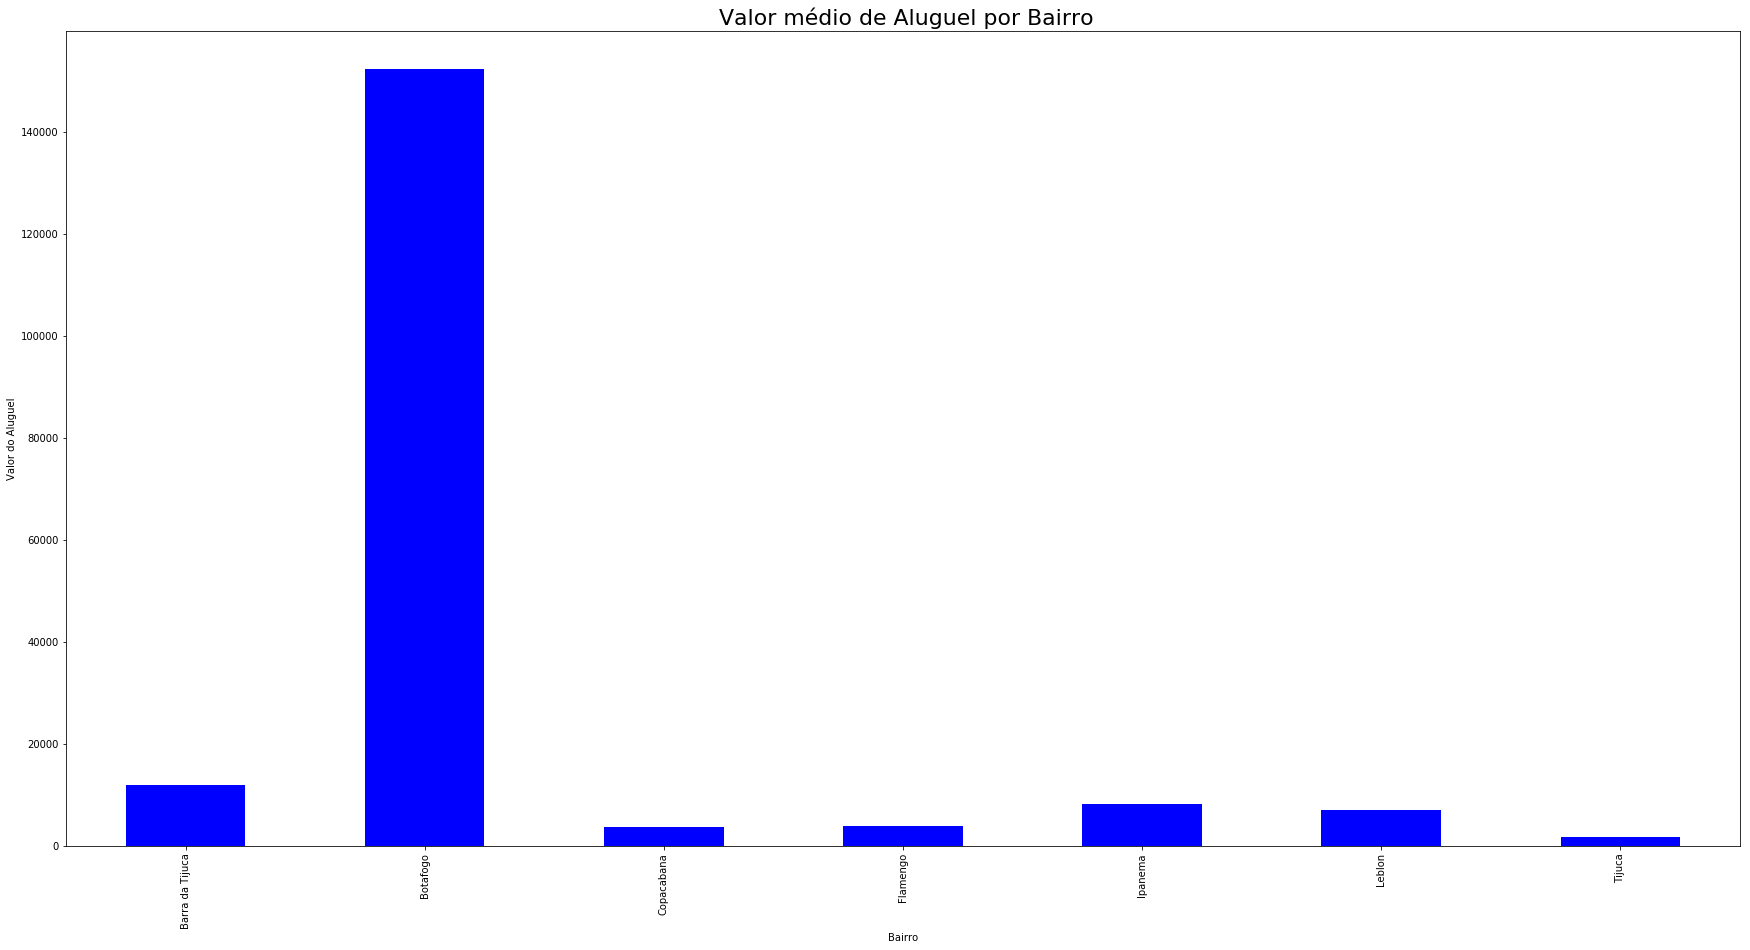

In [97]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel( 'Valor do Aluguel')
fig.set_title(' Valor médio de Aluguel por Bairro', fontsize = 22)

Text(0.5,1,' Valor médio de Aluguel por Bairro')

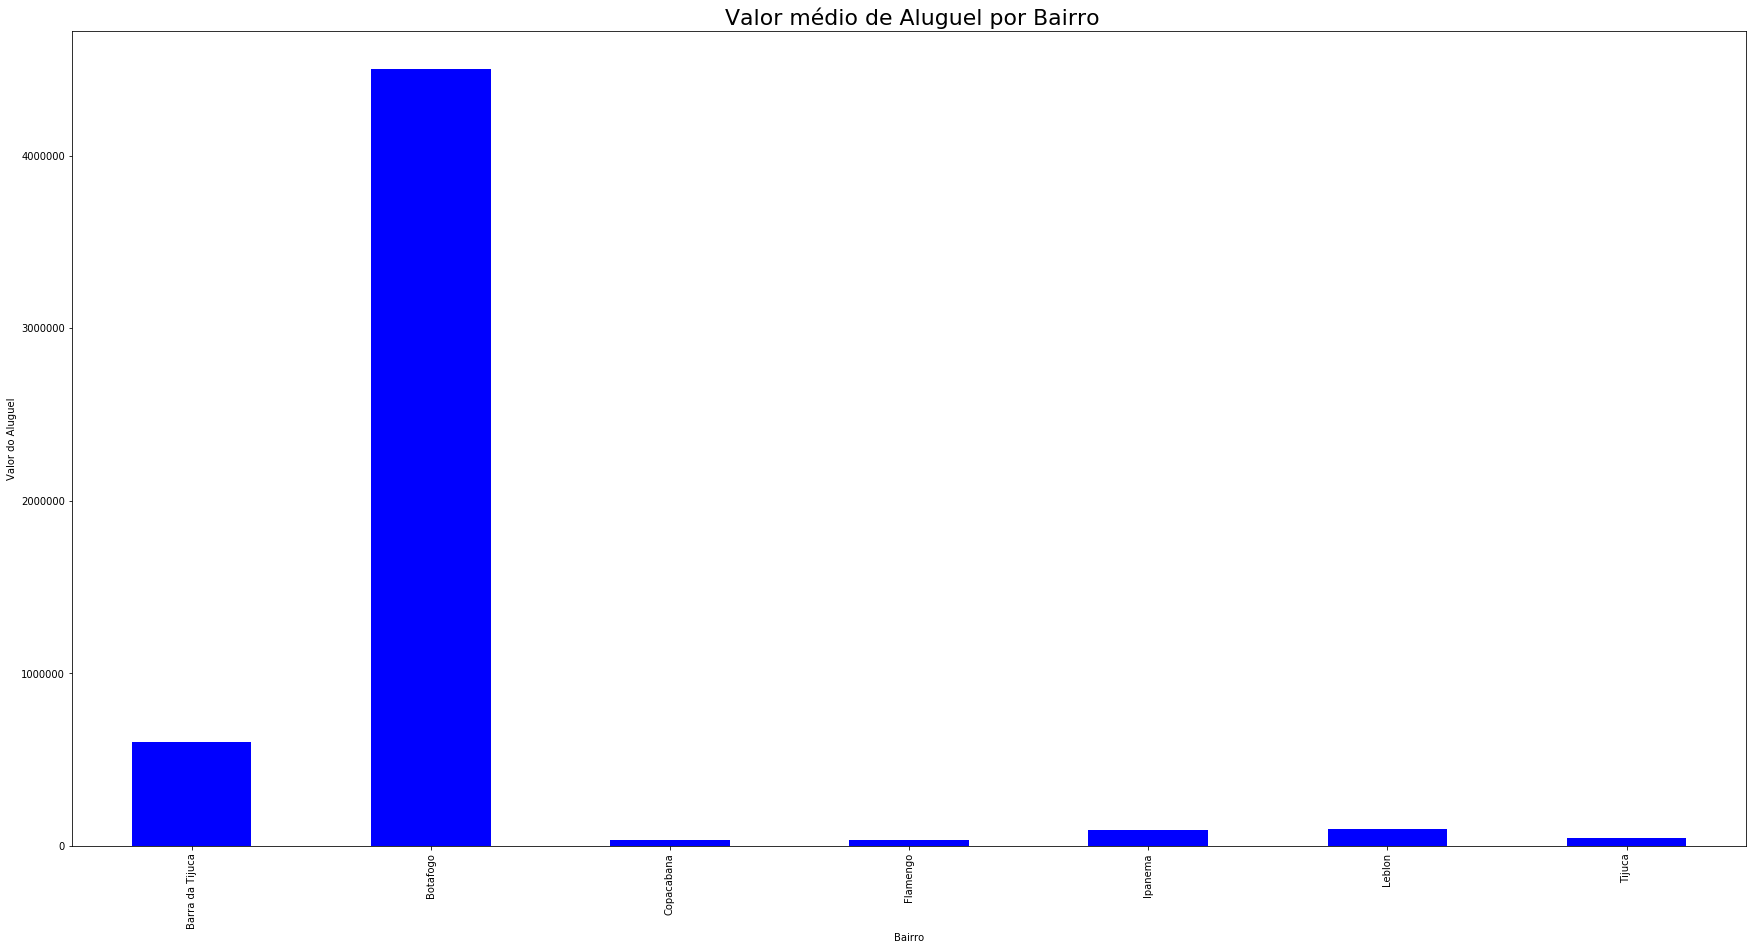

In [98]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel( 'Valor do Aluguel')
fig.set_title(' Valor médio de Aluguel por Bairro', fontsize = 22)

### Exercício

In [99]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [100]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [102]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


## Extra: Criando Faixas de Valor

In [103]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [104]:
# 1 e 2
#3 e 4
#5 e 6
#7 ou mais
classes = [0, 2, 4, 6, 100]

In [105]:
quartos = pd.cut(dados['Quartos'], classes)

In [106]:
quartos

0        (0, 2]
1        (0, 2]
2           NaN
3        (0, 2]
4        (0, 2]
5        (2, 4]
6        (0, 2]
7        (4, 6]
8        (0, 2]
9           NaN
10       (0, 2]
11       (0, 2]
12       (2, 4]
13       (0, 2]
14       (0, 2]
15       (2, 4]
16          NaN
17       (2, 4]
18       (2, 4]
19       (2, 4]
20       (0, 2]
21       (0, 2]
22       (2, 4]
23       (2, 4]
24       (0, 2]
25       (0, 2]
26          NaN
27       (2, 4]
28       (0, 2]
29          NaN
          ...  
32930    (0, 2]
32931    (4, 6]
32932    (2, 4]
32933    (0, 2]
32934    (0, 2]
32935    (0, 2]
32936    (0, 2]
32937       NaN
32938    (0, 2]
32939       NaN
32940    (0, 2]
32941    (2, 4]
32942       NaN
32943    (2, 4]
32944    (2, 4]
32945    (0, 2]
32946       NaN
32947    (2, 4]
32948       NaN
32949    (2, 4]
32950    (0, 2]
32951    (0, 2]
32952    (4, 6]
32953    (0, 2]
32954       NaN
32955       NaN
32956    (2, 4]
32957    (0, 2]
32958    (0, 2]
32959       NaN
Name: Quartos, Length: 3

In [107]:
pd.value_counts(quartos)

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Quartos, dtype: int64

In [108]:
labels = [' 1 e 2 quartos ', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']

In [115]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels)

In [116]:
pd.value_counts(quartos)

 1 e 2 quartos       12419
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

In [117]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True) #VERIFICAR SE HÁ 0 QUARTOS

In [118]:
pd.value_counts(quartos)

 1 e 2 quartos       22270
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64